# Sick House Bro
## Authors: Frank Vasquez (fav3ba), June Suh (kqj8be), Kevin Lin (pex7ps)
### Goal: Determine if the pandemic had a direct impact on the housing market, and see if trends are discoverable


### TODO:

First covid cases in US were confirmed in January 2020

For weekly assignment:
At a minimum, the file should include a summary containing:

Number of records\
Number of columns\
Statistical summary of response variable\
Statistical summary of potential predictor variables (if there are a large number of predictors, select the top 10)\
Note: Summarize categorical variables with counts and percentages for each level and summarize numerical variables with mean/quantiles/standard deviation.\
Include up to five helpful graphs

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

data_dir = '..\\data\\' # Windows, reverse slashes for MacOS

# Read in data

In [2]:
# fips to county read in and add columns to be compatible with other data

cols = ['state', 'state_fips','county_fips','county_name','H']
fips2county = pd.read_csv(f"{data_dir}\\fips2county.txt",dtype='str',names=cols)
fips2county['full_fips'] = fips2county.state_fips+fips2county.county_fips
fips2county['full_county'] = fips2county.county_name + ", " + fips2county.state
fips2county

,state,state_fips,county_fips,county_name,H,full_fips,full_county
0,AL,01,001,Autauga County,H1,01001,"Autauga County, AL"
1,AL,01,003,Baldwin County,H1,01003,"Baldwin County, AL"
2,AL,01,005,Barbour County,H1,01005,"Barbour County, AL"
3,AL,01,007,Bibb County,H1,01007,"Bibb County, AL"
4,AL,01,009,Blount County,H1,01009,"Blount County, AL"
...,...,...,...,...,...,...,...
3230,PR,72,153,Yauco Municipio,H1,72153,"Yauco Municipio, PR"
3231,UM,74,300,Midway Islands,H4,74300,"Midway Islands, UM"
3232,VI,78,010,St. Croix Island,H4,78010,"St. Croix Island, VI"
3233,VI,78,020,St. John Island,H4,78020,"St. John Island, VI"


In [3]:
# read in housing data, pull out counties and time during the pandemic

house = pd.read_csv(f"{data_dir}\\med_sale_price_counties.csv", header=1)
house.shape # 1860 counties, 120 months, only want last 24 (2020-2021)
house_county = pd.DataFrame(house.iloc[:,0])
house_pand = house.iloc[:, -24:]
new_house = house_county.join(house_pand)
new_house

,Region,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,...,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21
0,"Abbeville County, SC",$200K,$229K,$216K,$103K,$159K,$168K,$183K,$193K,$160K,...,$125K,$225K,$173K,$280K,$352K,$271K,$111K,$169K,$220K,$159K
1,"Ada County, ID",$360K,$360K,$365K,$366K,$360K,$372K,$385K,$400K,$404K,...,$463K,$480K,$510K,$517K,$538K,$525K,$525K,$526K,$530K,$539K
2,"Adair County, IA",$62K,$127K,$60K,$130K,$110K,$90K,$95K,$75K,$60K,...,$89K,$130K,$118K,$132K,$137K,$138K,$95K,$80K,$240K,$117K
3,"Adair County, OK",$92K,$99K,$169K,$124K,$98K,$135K,$90K,$88K,$103K,...,$115K,$283K,$79K,$95K,$103K,$136K,$226K,$157K,$145K,$190K
4,"Adams County, CO",$372K,$375K,$393K,$390K,$386K,$383K,$395K,$395K,$400K,...,$435K,$450K,$465K,$465K,$470K,$465K,$470K,$470K,$475K,$475K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,"York County, VA",$315K,$305K,$301K,$285K,$325K,$339K,$328K,$320K,$308K,...,$329K,$325K,$321K,$346K,$334K,$336K,$336K,$330K,$347K,$344K
1856,"Young County, TX",$113K,$123K,$116K,$130K,$93K,$145K,$145K,$163K,$205K,...,$197K,$200K,$150K,$175K,$249K,$305K,$139K,$177K,$190K,$198K
1857,"Yuba County, CA",$331K,$325K,$319K,$330K,$295K,$337K,$333K,$340K,$315K,...,$375K,$386K,$400K,$420K,$420K,$381K,$404K,$400K,$415K,$410K
1858,"Yuma County, CO",$180K,$160K,$180K,$244K,$175K,$130K,$181K,$200K,$180K,...,$311K,$205K,$188K,$213K,$293K,$158K,$180K,$215K,$120K,$190K


In [4]:
# read in covid death and positive case data

case_data = pd.read_csv(f'{data_dir}\\time_series_covid19_confirmed_US.csv')
death_data = pd.read_csv(f'{data_dir}\\time_series_covid19_deaths_US.csv')

In [5]:
# convert fips codes to strings
case_data['UID'] = case_data.UID.astype('str')
fips_str = []
for i in range(0, len(case_data)):
    fips_str.append(case_data.iloc[i].UID[3:8])
case_data['FIPS'] = fips_str

death_data['UID'] = death_data.UID.astype('str')
fips_str = []
for i in range(0, len(death_data)):
    fips_str.append(death_data.iloc[i].UID[3:8])
death_data['FIPS'] = fips_str
death_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,171,173,173,173,176,176,176,177,181,181
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,624,626,626,626,626,626,626,629,630,631
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,85,85,87,87,89,89,89,90,91,91
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,96,96,97,97,97,97,97,98,98,98
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,211,212,212,212,213,213,213,213,214,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039,Teton,Wyoming,US,43.935225,-110.589080,...,15,15,15,15,15,15,15,15,15,15
3338,84056041,US,USA,840,56041,Uinta,Wyoming,US,41.287818,-110.547578,...,36,36,36,36,36,36,36,36,36,36
3339,84090056,US,USA,840,90056,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043,Washakie,Wyoming,US,43.904516,-107.680187,...,42,42,42,42,42,42,42,42,42,42


In [6]:
# create month labels for aggregation
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"]
years = ['20','21'] #,'2022'] add back in if wanting 2022 data
combined = []
for x in months:
    for y in years:
        combined.append(x+"-"+y) # using same naming scheme as housing data
        
death_data[combined] = 0
case_data[combined] = 0

In [7]:
# aggregate to month columns
# there's gotta be a better way to do this but I can't think of it

# death data
for i in range(0, len(death_data.columns)):
    col_name = death_data.columns[i]
    temp = col_name.split('/')
    if(len(temp) == 3): # makes sure to only work on date columns
        temp = [int(i) for i in temp] 
        if(temp[2] == 20):
            if(temp[0] == 1): death_data['Jan-20'] = death_data['Jan-20']+death_data[col_name]
            if(temp[0] == 2): death_data['Feb-20'] = death_data['Feb-20']+death_data[col_name]
            if(temp[0] == 3): death_data['Mar-20'] = death_data['Mar-20']+death_data[col_name]
            if(temp[0] == 4): death_data['Apr-20'] = death_data['Apr-20']+death_data[col_name]
            if(temp[0] == 5): death_data['May-20'] = death_data['May-20']+death_data[col_name]
            if(temp[0] == 6): death_data['Jun-20'] = death_data['Jun-20']+death_data[col_name]
            if(temp[0] == 7): death_data['Jul-20'] = death_data['Jul-20']+death_data[col_name]
            if(temp[0] == 8): death_data['Aug-20'] = death_data['Aug-20']+death_data[col_name]
            if(temp[0] == 9): death_data['Sep-20'] = death_data['Sep-20']+death_data[col_name]
            if(temp[0] == 10): death_data['Oct-20'] = death_data['Oct-20']+death_data[col_name]
            if(temp[0] == 11): death_data['Nov-20'] = death_data['Nov-20']+death_data[col_name]
            if(temp[0] == 12): death_data['Dec-20'] = death_data['Dec-20']+death_data[col_name]
        if(temp[2] == 21):
            if(temp[0] == 1): death_data['Jan-21'] = death_data['Jan-21']+death_data[col_name]
            if(temp[0] == 2): death_data['Feb-21'] = death_data['Feb-21']+death_data[col_name]
            if(temp[0] == 3): death_data['Mar-21'] = death_data['Mar-21']+death_data[col_name]
            if(temp[0] == 4): death_data['Apr-21'] = death_data['Apr-21']+death_data[col_name]
            if(temp[0] == 5): death_data['May-21'] = death_data['May-21']+death_data[col_name]
            if(temp[0] == 6): death_data['Jun-21'] = death_data['Jun-21']+death_data[col_name]
            if(temp[0] == 7): death_data['Jul-21'] = death_data['Jul-21']+death_data[col_name]
            if(temp[0] == 8): death_data['Aug-21'] = death_data['Aug-21']+death_data[col_name]
            if(temp[0] == 9): death_data['Sep-21'] = death_data['Sep-21']+death_data[col_name]
            if(temp[0] == 10): death_data['Oct-21'] = death_data['Oct-21']+death_data[col_name]
            if(temp[0] == 11): death_data['Nov-21'] = death_data['Nov-21']+death_data[col_name]
            if(temp[0] == 12): death_data['Dec-21'] = death_data['Dec-21']+death_data[col_name] # don't have data after this for houses
        #if(temp[2] == 22):
         #   if(temp[0] == 1): death_data['Jan-2022'] = death_data['Jan-2022']+death_data[col_name]
          #  if(temp[0] == 2): death_data['Feb-2022'] = death_data['Feb-2022']+death_data[col_name] # data after this won't exist
                
# case data
for i in range(0, len(case_data.columns)):
    col_name = case_data.columns[i]
    temp = col_name.split('/')
    if(len(temp) == 3): # makes sure to only work on date columns
        temp = [int(i) for i in temp] 
        if(temp[2] == 20):
            if(temp[0] == 1): case_data['Jan-20'] = case_data['Jan-20']+case_data[col_name]
            if(temp[0] == 2): case_data['Feb-20'] = case_data['Feb-20']+case_data[col_name]
            if(temp[0] == 3): case_data['Mar-20'] = case_data['Mar-20']+case_data[col_name]
            if(temp[0] == 4): case_data['Apr-20'] = case_data['Apr-20']+case_data[col_name]
            if(temp[0] == 5): case_data['May-20'] = case_data['May-20']+case_data[col_name]
            if(temp[0] == 6): case_data['Jun-20'] = case_data['Jun-20']+case_data[col_name]
            if(temp[0] == 7): case_data['Jul-20'] = case_data['Jul-20']+case_data[col_name]
            if(temp[0] == 8): case_data['Aug-20'] = case_data['Aug-20']+case_data[col_name]
            if(temp[0] == 9): case_data['Sep-20'] = case_data['Sep-20']+case_data[col_name]
            if(temp[0] == 10): case_data['Oct-20'] = case_data['Oct-20']+case_data[col_name]
            if(temp[0] == 11): case_data['Nov-20'] = case_data['Nov-20']+case_data[col_name]
            if(temp[0] == 12): case_data['Dec-20'] = case_data['Dec-20']+case_data[col_name]
        if(temp[2] == 21):
            if(temp[0] == 1): case_data['Jan-21'] = case_data['Jan-21']+case_data[col_name]
            if(temp[0] == 2): case_data['Feb-21'] = case_data['Feb-21']+case_data[col_name]
            if(temp[0] == 3): case_data['Mar-21'] = case_data['Mar-21']+case_data[col_name]
            if(temp[0] == 4): case_data['Apr-21'] = case_data['Apr-21']+case_data[col_name]
            if(temp[0] == 5): case_data['May-21'] = case_data['May-21']+case_data[col_name]
            if(temp[0] == 6): case_data['Jun-21'] = case_data['Jun-21']+case_data[col_name]
            if(temp[0] == 7): case_data['Jul-21'] = case_data['Jul-21']+case_data[col_name]
            if(temp[0] == 8): case_data['Aug-21'] = case_data['Aug-21']+case_data[col_name]
            if(temp[0] == 9): case_data['Sep-21'] = case_data['Sep-21']+case_data[col_name]
            if(temp[0] == 10): case_data['Oct-21'] = case_data['Oct-21']+case_data[col_name]
            if(temp[0] == 11): case_data['Nov-21'] = case_data['Nov-21']+case_data[col_name]
            if(temp[0] == 12): case_data['Dec-21'] = case_data['Dec-21']+case_data[col_name] # don't have data after this for houses
     #   if(temp[2] == 22):
      #      if(temp[0] == 1): case_data['Jan-2022'] = case_data['Jan-2022']+case_data[col_name]
       #     if(temp[0] == 2): case_data['Feb-2022'] = case_data['Feb-2022']+case_data[col_name] # data after this won't exist

In [8]:
# take only relevant columns
combined.append('FIPS') # for making new DFs with only relevant columns
death_data_clean = death_data[combined]
case_data_clean = case_data[combined]
# change index to FIPS and drop FIPS column
case_data_clean.index = case_data_clean.FIPS
case_data_clean = case_data_clean.drop('FIPS', axis=1)
death_data_clean.index = death_data_clean.FIPS
death_data_clean = death_data_clean.drop('FIPS', axis=1)

# Combine Data

In [9]:
# add fips to house data frame
fips2county = fips2county.rename(columns={'full_county':'Region'})
house = pd.merge(new_house, fips2county, on=['Region'])

# drop unnecessary columns and index by FIPS and date
house = house.rename(columns={'full_fips':'FIPS'})
house.index = house.FIPS
house = house.drop(['Region','state','state_fips','county_fips','county_name','H','FIPS'], axis=1) # drops extra columns
house_date_fips = pd.DataFrame(house.unstack(), columns=['median_home_value']) # indexes by date and FIPS

In [10]:
# index death and case data by date
case_date_fips = pd.DataFrame(case_data_clean.unstack(), columns=['confirmed_cases'])
death_date_fips = pd.DataFrame(death_data_clean.unstack(), columns=['confirmed_deaths'])
case_date_fips = case_date_fips.dropna()
death_date_fips = death_date_fips.dropna()

In [11]:
# create column to join on for all dfs

death_date_fips['date_fips'] = ""
for i in range(0,len(death_date_fips)):
    death_date_fips['date_fips'][i] = death_date_fips.index[i][0]+'-'+death_date_fips.index[i][1]
    
case_date_fips['date_fips'] = ""
for i in range(0,len(case_date_fips)):
    case_date_fips['date_fips'][i] = case_date_fips.index[i][0]+'-'+case_date_fips.index[i][1]
    
house_date_fips['date_fips'] = ""
for i in range(0,len(house_date_fips)):
    house_date_fips['date_fips'][i] = house_date_fips.index[i][0]+'-'+house_date_fips.index[i][1]


<ipython-input-11-04dcac0516b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_date_fips['date_fips'][i] = death_date_fips.index[i][0]+'-'+death_date_fips.index[i][1]
<ipython-input-11-04dcac0516b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_date_fips['date_fips'][i] = case_date_fips.index[i][0]+'-'+case_date_fips.index[i][1]


In [12]:
combined_df = pd.merge(house_date_fips, death_date_fips, on=['date_fips'])
combined_df = pd.merge(combined_df, case_date_fips, on=['date_fips'])

In [13]:
combined_df = combined_df.dropna() # could try to interpolate instead of dropping
combined_df

,median_home_value,date_fips,confirmed_deaths,confirmed_cases
0,$200K,Jan-20-45001,0,0
1,$360K,Jan-20-16001,0,0
2,$62K,Jan-20-19001,0,0
3,$92K,Jan-20-40001,0,0
4,$372K,Jan-20-08001,0,0
...,...,...,...,...
44058,$330K,Dec-21-45091,16610,1536522
44059,$344K,Dec-21-51199,2598,184938
44060,$198K,Dec-21-48503,2281,94117
44061,$410K,Dec-21-06115,2929,341534


In [14]:
# convert home value to dollars
med_val = list(combined_df['median_home_value'])
med_val = [x[1:-1] for x in med_val]
med_val = [int(x.replace(',', '')) for x in med_val] # convert to int and handle commas
combined_df['median_home_value'] = med_val
combined_df['median_home_value'] = combined_df['median_home_value'].apply(lambda x: x*1000)
combined_df

,median_home_value,date_fips,confirmed_deaths,confirmed_cases
0,200000,Jan-20-45001,0,0
1,360000,Jan-20-16001,0,0
2,62000,Jan-20-19001,0,0
3,92000,Jan-20-40001,0,0
4,372000,Jan-20-08001,0,0
...,...,...,...,...
44058,330000,Dec-21-45091,16610,1536522
44059,344000,Dec-21-51199,2598,184938
44060,198000,Dec-21-48503,2281,94117
44061,410000,Dec-21-06115,2929,341534


In [22]:
# pull out fips code
dateFips = list(combined_df['date_fips'])
fips = [x[-5:] for x in dateFips]
combined_df['fips'] = fips

In [15]:
# predictor 1
combined_df['confirmed_cases'].describe()

count    3.847500e+04
mean     3.191115e+05
std      1.236092e+06
min      0.000000e+00
25%      4.597500e+03
50%      5.142800e+04
75%      1.897640e+05
max      4.871761e+07
Name: confirmed_cases, dtype: float64

In [16]:
# predictor 2
combined_df['confirmed_deaths'].describe()

count     38475.000000
mean       5733.533801
std       22782.595651
min           0.000000
25%          70.000000
50%         946.000000
75%        3303.000000
max      849402.000000
Name: confirmed_deaths, dtype: float64

In [17]:
# response
combined_df['median_home_value'].describe()

count    3.847500e+04
mean     2.515151e+05
std      1.862577e+05
min      0.000000e+00
25%      1.570000e+05
50%      2.160000e+05
75%      2.980000e+05
max      1.225000e+07
Name: median_home_value, dtype: float64

In [25]:
miami = combined_df[combined_df.fips == "12086"] # Miami-Dade County
miami

,median_home_value,date_fips,confirmed_deaths,confirmed_cases,fips
1108,310000,Jan-20-12086,0,0,12086
2944,320000,Feb-20-12086,0,0,12086
4780,330000,Mar-20-12086,16,9119,12086
6616,330000,Apr-20-12086,4893,236642,12086
8452,329000,May-20-12086,16802,472942,12086
10288,340000,Jun-20-12086,25233,720812,12086
12124,340000,Jul-20-12086,38279,2368536,12086
13960,350000,Aug-20-12086,63646,4403987,12086
15796,352000,Sep-20-12086,87810,4948751,12086
17632,350000,Oct-20-12086,108317,5508470,12086


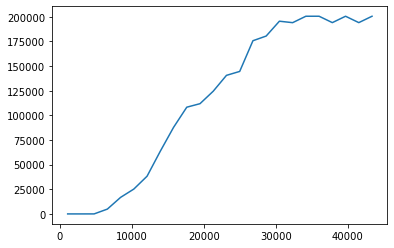

In [30]:
plt.plot(miami['confirmed_deaths'])

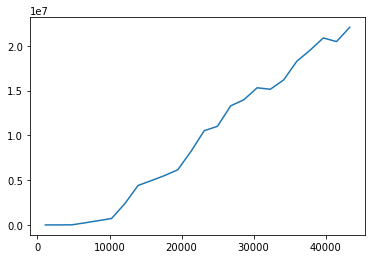

In [31]:
plt.plot(miami['confirmed_cases'])

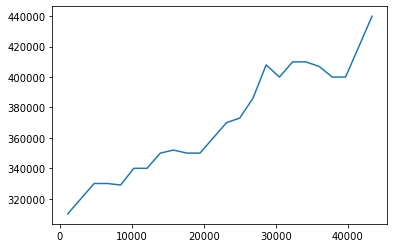

In [32]:
plt.plot(miami['median_home_value'])